<a href="https://colab.research.google.com/github/MoizAhmed2517/Deep_Learning_Projects/blob/main/101_Food_Classification_(Mini_10_Data_Set).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Model on 101_Class of food - Image classification

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2022-12-09 18:26:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  31.7MB/s    in 50s     

2022-12-09 18:27:18 (31.1 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [3]:
!wget https://raw.githubusercontent.com/MoizAhmed2517/Deep_Learning_Projects/main/helper_function.py

--2022-12-09 18:27:46--  https://raw.githubusercontent.com/MoizAhmed2517/Deep_Learning_Projects/main/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10169 (9.9K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   9.93K  --.-KB/s    in 0s      

2022-12-09 18:27:46 (100 MB/s) - ‘helper_function.py’ saved [10169/10169]



In [5]:
from helper_function import load_and_prep_image, make_confusion_matrix, walk_through_dir, unzip_data, compare_historys, plot_loss_curves, create_tensorboard_callback, pred_and_plot, make_confusion_matrix, calculate_results

In [7]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Baseline: Our baseline is to beat 50.76% accuracy done using ML model (Random Forest). Now trying to beat it with Deep learning models

In [8]:
unzip_data('101_food_classes_10_percent.zip')

In [9]:
train_dir = '101_food_classes_10_percent/train'
test_dir = "101_food_classes_10_percent/test"

In [10]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pho'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chocolate_mousse'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chocolate_cake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/churros'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/foie_gras'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/red_velvet_cake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/gnocchi'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/spaghetti_carbonara'.
There are 0 directories and 75 imag

In [11]:
#setting our inputs

IMG_SIZE = (224, 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


### Train a big dog model with transfer learning on 10% of 101 food classes

Here are the experiments we'll be going to take:
* Create a ModelCheckpoint callback
* Create a data augmenetation layer to build data augmentation right into the Model
* Build a headless (no top layers Functional) EfficientNetB0 backboned-model
* Compile our model
* Feature extract for 5 full passes ( 5 epochs and 15% Validation of the test data)

###Create a checkpoint callback

In [13]:
checkpoint_path  = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor='val_accuracy',
                                                         save_weights_only=True,
                                                         save_best_only=True)

In [14]:
# creating a data augmentation layer
from tensorflow.keras import layers

data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name="Data_Aug_Layer")


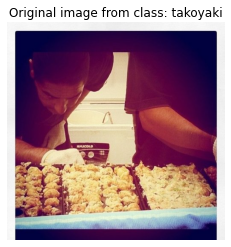

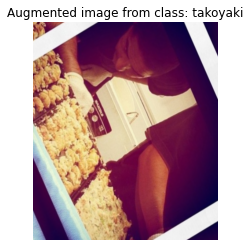

In [22]:
# visualizing our model
import random
import matplotlib.image as mpimg 

target_class = random.choice(train_data.class_names)
target_dir = "101_food_classes_10_percent/train/" + target_class
rand_img = random.choice(os.listdir(target_dir))
rand_img_path = target_dir + "/" + rand_img

img = mpimg.imread(rand_img_path)
plt.imshow(img)
plt.title(f"Original image from class: {target_class}")
plt.axis(False);

# PLotting our augmented image

aug_img = data_aug(tf.expand_dims(img, 0), tf.float32)
plt.figure()
plt.title(f"Augmented image from class: {target_class}")
plt.imshow(tf.squeeze(aug_img)/255.)
plt.axis(False);